# Pandas in Jupyter - Quickstart and Useful Snippets

**Who should use this note**: Anyone who want to quick go through pandas and apply it in machine learning.

This article overviews how to quickly set up and get started with the pandas data analysis library. It also lists common code snippets for parsing, loading, and transforming data. For more detailed documentation on pandas’ more advanced features (e.g. plot styling and combining data frames) you’ll need to refer to other sources.

This note is based on Nikolay Grozev's blog. For more information, see this link http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/

Note: you need **pandas**, **numpy** and **matpotlib** installed on your enviroment.

In [38]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Creating Data Frames

Data frames are the central concept in pandas. In essence, a data frame is table with labeled rows and columns. Data frames can be created from multiple sources - e.g. CSV files, excel files, and JSON.

### 1. Loading data from text file

Loading a CSV file as a data frame is pretty easy:

```python 
data_frame = pandas.read_csv('file.csv', sep=';') 
```

Sometimes the CSV file contains padding spaces in front of the values. To ignore them use the skipinitialspaces parameter:
```python
pandas.read_csv('file.csv', sep=';', skipinitialspace=True)
```
If the padding white spaces occur on both sides of the cell values we need to use a regular expression separator. In this case, we need to use the ‘python’ processing engine, instead of the underlying native one, in order to avoid warnings. This will degrade the performance a bit:
```python
pandas.read_csv('file.csv', sep='\s*;\s*', skipinitialspace=True, engine='python')
```
Sometimes we need to sample the data before loading it, as it is too big to fit in memory. This can be achieved following this approach.

In [39]:
# loading data from txt file
dataframe = pd.read_csv('ex1data1.txt', sep=',', names=['population', 'profit']) # sep denotes the deliminator of input file
dataframe.head() # display the top 5 rows

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 2. Hardcoded Dataframes

Hardcoded data frames can be constructed by providing a hash of columns and their values.

In [40]:
df2 = pd.DataFrame({
   'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
   'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
   'col3': [1, 2, np.nan, 4]
})
df2.head() # display the top 5 rows

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
2,Item1,Gold,NaN
3,Item1,Silver,4.0


## Previewing data

To preview the data and the metadata of a dataframe you can use the following functions:

In [41]:
# Displays the top 5 rows. Accepts an optional int parameter - num. of rows to show
df.head()

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
2,Item1,Gold,NaN
3,Item1,Silver,4.0


In [42]:
# Similar to head, but displays the last rows
df.tail()

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
2,Item1,Gold,NaN
3,Item1,Silver,4.0


In [43]:
# Displays descriptive stats for all columns
df.describe()

,col3
count,3.000000
mean,2.333333
std,1.527525
min,1.000000
25%,1.500000
50%,2.000000
75%,3.000000
max,4.000000


In [44]:
# Displays information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
col1    4 non-null object
col2    4 non-null object
col3    3 non-null float64
dtypes: float64(1), object(2)
memory usage: 176.0+ bytes


In [45]:
# The number of columns. Equal to df.shape[0]
len(df) 

4

In [46]:
# The dimensions of the dataframe as a (rows, cols) tuple
df.shape

(4, 3)

In [47]:
# An array of the column names
df.columns 

Index(['col1', 'col2', 'col3'], dtype='object')

In [48]:
# Columns and their types
df.dtypes

col1     object
col2     object
col3    float64
dtype: object

In [49]:
# Converts the frame to a two-dimensional table
df.values

array([['Item0', 'Gold', 1.0],
       ['Item0', 'Bronze', 2.0],
       ['Item1', 'Gold', nan],
       ['Item1', 'Silver', 4.0]], dtype=object)

## Sorting
The sort_index method is used to sort the frame by one of its axis indices. The axis is either 0 or 1 - row/column axis respectively:

In [50]:
# Sort rows descendingly by the index
df.sort_index(axis=0, ascending=False)

,col1,col2,col3
3,Item1,Silver,4.0
2,Item1,Gold,NaN
1,Item0,Bronze,2.0
0,Item0,Gold,1.0


We can also sort by one or multiple columns:

In [51]:
# Sort rows by population and then profit in descending order
df.sort_values(by=['col1', 'col2'], ascending=False)

,col1,col2,col3
3,Item1,Silver,4.0
2,Item1,Gold,NaN
0,Item0,Gold,1.0
1,Item0,Bronze,2.0


## Selecting/Querying

Individual columns can be selected with the [] operator or directly as attributes:

In [52]:
# Selects only the column named 'col1';
df.col1

0    Item0
1    Item0
2    Item1
3    Item1
Name: col1, dtype: object

In [53]:
# Same as previous
df['col1']

0    Item0
1    Item0
2    Item1
3    Item1
Name: col1, dtype: object

In [54]:
# Select two columns
df[['col1', 'col2']]

,col1,col2
0,Item0,Gold
1,Item0,Bronze
2,Item1,Gold
3,Item1,Silver


You can also select by absolute coordinates/position in the frame. Indices are zero based:

In [55]:
# Selects second row
df.iloc[1]

col1     Item0
col2    Bronze
col3         2
Name: 1, dtype: object

In [56]:
# Selects rows 1-to-3
df.iloc[1:3]

,col1,col2,col3
1,Item0,Bronze,2.0
2,Item1,Gold,NaN


In [57]:
# First row, first column
df.iloc[0,0]

'Item0'

In [58]:
# First 4 rows and first 2 columns
df.iloc[0:4, 0:2]

,col1,col2
0,Item0,Gold
1,Item0,Bronze
2,Item1,Gold
3,Item1,Silver


Most often, we need to select by a condition on the cell values. To do so, we provide a boolean array denoting which rows will be selected. The trick is that pandas predefines many boolean operators for its data frames and series. For example the following expression produces a boolean array:

In [59]:
# Produces and array, not a single value!
df.col3 > 0

0     True
1     True
2    False
3     True
Name: col3, dtype: bool

This allows us to write queries like these:

In [60]:
# Query by a single column value
df[df.col3 > 0] 

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
3,Item1,Silver,4.0


In [61]:
# Query by a single column, if it is in a list of predefined values
df[df['col2'].isin(['Gold', 'Silver'])] 

,col1,col2,col3
0,Item0,Gold,1.0
2,Item1,Gold,NaN
3,Item1,Silver,4.0


In [62]:
# A conjunction query using two columns
df[(df['col3'] > 0) & (df['col2'] == 'Silver')] 

,col1,col2,col3
3,Item1,Silver,4.0


In [63]:
# A disjunction query using two columns
df[(df['col3'] > 0) | (df['col2'] == 'Silver')]

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
3,Item1,Silver,4.0


In [64]:
# A query checking the textual content of the cells
df[df.col2.str.contains('ilver')]

,col1,col2,col3
3,Item1,Silver,4.0


## Modifying Data Frames

Pandas’ operations tend to produce new data frames instead of modifying the provided ones. Many operations have the optional boolean inplace parameter which we can use to force pandas to apply the changes to subject data frame.

It is also possible to directly assign manipulate the values in cells, columns, and selections as follows:

In [65]:
dataframe = df.copy()

# Modifies the cell identified by its row index and column name
dataframe.at[1, 'col2'] = 'Bronze and Gold' 

# Modifies the cell identified by its absolute row and column indices
dataframe.iat[1,1] = 'Bronze again' 

# Replaces the column with the array. It could be a numpy array or a simple list.
#Could also be used to create new columns
dataframe.loc[:,'col3'] = ['Unknown'] * len(df) 

# Equivalent to the previous
dataframe.col3 = ['Unknown'] * len(df) 

# Removes all rows with any missing values.
dataframe.dropna(how='any') 

# Removes all rows with all missing values.
dataframe.dropna(how='all')

,col1,col2,col3
0,Item0,Gold,Unknown
1,Item0,Bronze again,Unknown
2,Item1,Gold,Unknown
3,Item1,Silver,Unknown


It is often useful to create new columns based on existing ones by using a function. The new columns are often called Derived Characteristics:

In [66]:
dataframe = df.copy()

def f(x):
    return x + ' New';

dataframe['col4'] = f(dataframe.col1)

dataframe

,col1,col2,col3,col4
0,Item0,Gold,1.0,Item0 New
1,Item0,Bronze,2.0,Item0 New
2,Item1,Gold,NaN,Item1 New
3,Item1,Silver,4.0,Item1 New


You can also use `assign()` function to add new column to a dataframe.

In [67]:
dataframe = df.copy()

def g(x, y):
    return x + '-' + y

# Uses the 2-arg function g to create a new column based on 2 existing columns
dataframe = dataframe.assign(col4=g(dataframe['col1'], dataframe['col2']))

dataframe

,col1,col2,col3,col4
0,Item0,Gold,1.0,Item0-Gold
1,Item0,Bronze,2.0,Item0-Bronze
2,Item1,Gold,NaN,Item1-Gold
3,Item1,Silver,4.0,Item1-Silver


## Dates and Time

When loading data from a CSV, we can tell pandas to look for and parse dates. The parse_dates parameters can be used for that. In the most typical case, you would pass a list of column names as parse_dates:
This will work for most typical date formats. If it does not (i.e. we have a non-standard date format) we need to supply our own date parser:
```python
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d') for d in dates]
dates_df = pandas.read_csv('test.csv', sep=';', parse_dates=['col1'], date_parser=custom_parser)

```

In [68]:
dates_df = pd.read_csv('date.txt', sep=' +', engine='python', parse_dates=True)
dates_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq=None)

Alternatively, if we’ve already loaded the data frame we can change a column from string to a date:

In [69]:
dates_df = pd.read_csv('date.txt', sep=' +', engine='python')
dates_df.index = pd.to_datetime(dates_df.index, format='%Y-%m-%d')
dates_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq=None)

For more on date-time formats look at the documentation.

Often we need to work with Unix/Posix timestamps. Converting numeric timestamps to pandas timestamps is easy with the unit parameter:

```python
# Unit specifies if the time is in seconds('s'), millis ('ms'), nanos('ns') etc.
dates_df['col'] = pandas.to_datetime(dates_df['col'], unit='ms')
```
If we need to parse Posix timestamps while reading CSVs, we can once again resort to converter functions. In the converter function we can use the pandas.to_datetime utility which accepts a unit parameter:
```python
def timestamp_parser(n):
    # Specify the unit you need
    return pandas.to_datetime(float(n), unit='ms')

dates_df = pandas.read_csv('test.csv', sep=';', parse_dates=['col1'], date_parser=timestamp_parser)
```
We can also convert time/timestamp data to Unix epoch numbers:

```python
# Creates a new numeric column with the timestamp epoch in nanos
dates_df.col4 = pandas.to_numeric(dates_df.col3)
```

## Plotting

In [70]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot()

NameError: name 'ts' is not defined

You can plot one column versus another using the x and y keywords in plot():

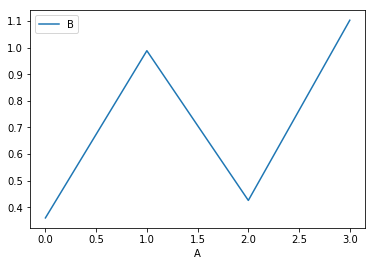

In [71]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')